In [1]:
#Task 7.1 Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend?

import os
import pandas as pd

os.chdir('/Users/[editted]/Desktop/compsoc/data/boston_crime_2019')
crime_2019 =  pd.read_csv('crime_incidents_2019.csv', low_memory=False)
os.chdir('/Users/[editted]/Desktop/compsoc/data/boston_crime_2020')
crime_2020 = pd.read_csv('crime_incidents_2020.csv', low_memory=False)
os.chdir('/Users/[editted]/Desktop/compsoc/data')
concat_data = pd.concat([crime_2019,crime_2020])
cleaned_data = concat_data.drop_duplicates()
new_data = cleaned_data.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
new_data.to_csv('cleaned_crime_incidents.csv')

new_data['offense_type'] = None
new_data['offense_type'][new_data['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
new_data['offense_type'][new_data['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|auto '
                                                                                  'theft|arson')] = 'property crime'
describe_by_offense = new_data.groupby(['offense_type', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_by_offense

/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/598609957.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['offense_type'] = None
/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/598609957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['offense_type'][new_data['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/598609957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,offense_type,YEAR,INCIDENT_NUMBER
0,property crime,2019,13158
1,property crime,2020,12227
2,violent crime,2019,8324
3,violent crime,2020,5152


### Task 7.1 Trend
* For both years, there are significantly more property crimes than violent crimes.
* For both types of crimes, there seemed to be a decline in incidents in 2020 compared with 2019.

<AxesSubplot:xlabel='annual property crimes', ylabel='annual violent crimes'>

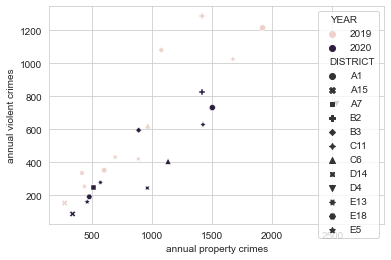

In [2]:
#Task 7.2 Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years.
import pandas as pd
import seaborn as sns
new_data = new_data[new_data.DISTRICT != "External"]
new_data = new_data[~new_data['DISTRICT'].isna()]
df1 = new_data[new_data['offense_type'] == 'property crime']
df1 = df1.rename(columns={'INCIDENT_NUMBER': 'annual property crimes'})
df_1 = df1.groupby(['YEAR', 'DISTRICT']).agg({'annual property crimes': 'count'}).reset_index()
df2 = new_data[new_data['offense_type'] == 'violent crime']
df2 = df2.rename(columns={'INCIDENT_NUMBER': 'annual violent crimes'})
df_2 = df2.groupby(['YEAR', 'DISTRICT']).agg({'annual violent crimes': 'count'}).reset_index()
df = pd.merge(df_1,df_2, how='left', on=['YEAR', 'DISTRICT'])
sns.scatterplot(x='annual property crimes', y='annual violent crimes', data=df, hue='YEAR', style='DISTRICT')

<AxesSubplot:xlabel='DISTRICT', ylabel='annual sums'>

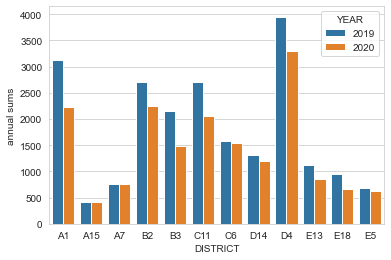

In [3]:
#Task 7.3 Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years.
df["annual sums"] = df["annual property crimes"] + df["annual violent crimes"]
sns.barplot(x='DISTRICT', y='annual sums', data=df, hue='YEAR')

<AxesSubplot:xlabel='quarter_year', ylabel='district-level shooting incidents (counts)'>

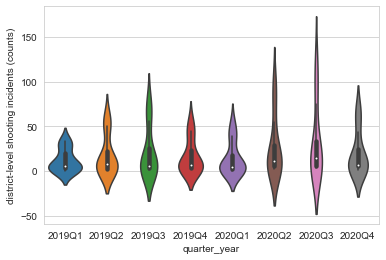

In [4]:
#Task 7.4 Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

import os
import pandas as pd

os.chdir('/Users/heather/Desktop/compsoc/data')
new_data = pd.read_csv('cleaned_crime_incidents.csv', low_memory=False)
new_data = new_data[new_data.DISTRICT != "External"]
new_data = new_data[~new_data['DISTRICT'].isna()]
new_data.loc[new_data['MONTH'].isin([1,2,3]), 'quarters'] = 'Q1'
new_data.loc[new_data['MONTH'].isin([4,5,6]), 'quarters'] = 'Q2'
new_data.loc[new_data['MONTH'].isin([7,8,9]), 'quarters'] = 'Q3'
new_data.loc[new_data['MONTH'].isin([10,11,12]), 'quarters'] = 'Q4'
new_data = new_data.groupby(['DISTRICT', 'YEAR', 'quarters']).agg({'SHOOTING': 'sum'}).reset_index()
new_data['quarter_year'] = new_data['YEAR'].astype('str') + new_data['quarters']
new_data = new_data.rename(columns={'SHOOTING': 'district-level shooting incidents (counts)'})
sns. violinplot(x='quarter_year', y='district-level shooting incidents (counts)', data=new_data)

/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/3430173728.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['quarters'][new_data['MONTH'].astype('str').str.contains('1|2|3')] = 'Q1'
/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/3430173728.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['quarters'][new_data['MONTH'].astype('str').str.contains('4|5|6')] = 'Q2'
/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_18042/3430173728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

<AxesSubplot:xlabel='quarter_year', ylabel='district-level shooting incidents (counts)'>

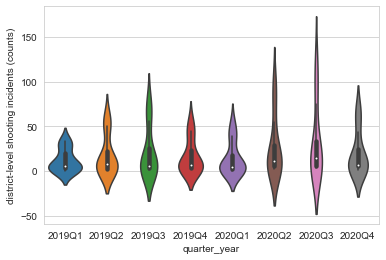

In [5]:
#7.4 Alternative

import os
import pandas as pd

os.chdir('/Users/heather/Desktop/compsoc/data')
new_data = pd.read_csv('cleaned_crime_incidents.csv', low_memory=False)
new_data = new_data[new_data.DISTRICT != "External"]
new_data = new_data[~new_data['DISTRICT'].isna()]
new_data['quarters'] = None
new_data['quarters'][new_data['MONTH'].astype('str').str.contains('1|2|3')] = 'Q1'
new_data['quarters'][new_data['MONTH'].astype('str').str.contains('4|5|6')] = 'Q2'
new_data['quarters'][new_data['MONTH'].astype('str').str.contains('7|8|9')] = 'Q3'
new_data['quarters'][new_data['MONTH'].astype('str').str.contains('10|11|12')] = 'Q4'
new_data = new_data.groupby(['DISTRICT', 'YEAR', 'quarters']).agg({'SHOOTING': 'sum'}).reset_index()
new_data['quarter_year'] = new_data['YEAR'].astype('str') + new_data['quarters']
new_data = new_data.rename(columns={'SHOOTING': 'district-level shooting incidents (counts)'})
sns. violinplot(x='quarter_year', y='district-level shooting incidents (counts)', data=new_data)